In [1]:
#import dataset
import pandas as pd
import numpy as np
#visualization
import matplotlib.pyplot as plt
import seaborn as sns
#data preprocessing
from sklearn.preprocessing import LabelEncoder
#treating outlier
from scipy import stats
# interactive data visualization library
# import plotly.express  as px 


# 1: Data Collection and Reading

In [2]:
data = pd.read_excel("Agri_data_Combine.xlsx")

In [3]:
data.head(20)

,Country,Item,Year,hg_ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,GDP,Agri_GDP,Population_total,Rural_population,Labor_force_total,male_employment,female_employment,Agricultural_land,Agricultural_land_percent,Arable_land_per_person,Fertilizer_consumption,Cereal_yield
0,Albania,Maize,1990,36613,812.23450,121.0,16.37,2.028554e+09,NaN,3286542,63.572,1374478,NaN,NaN,11210.0,40.912409,0.176173,176.165803,2794.4
1,Albania,Potatoes,1990,66667,812.23450,121.0,16.37,2.028554e+09,NaN,3286542,63.572,1374478,NaN,NaN,11210.0,40.912409,0.176173,176.165803,2794.4
2,Albania,"Rice, paddy",1990,23333,812.23450,121.0,16.37,2.028554e+09,NaN,3286542,63.572,1374478,NaN,NaN,11210.0,40.912409,0.176173,176.165803,2794.4
3,Albania,Sorghum,1990,12500,812.23450,121.0,16.37,2.028554e+09,NaN,3286542,63.572,1374478,NaN,NaN,11210.0,40.912409,0.176173,176.165803,2794.4
4,Albania,Soybeans,1990,7000,812.23450,121.0,16.37,2.028554e+09,NaN,3286542,63.572,1374478,NaN,NaN,11210.0,40.912409,0.176173,176.165803,2794.4
5,Albania,Wheat,1990,30197,812.23450,121.0,16.37,2.028554e+09,NaN,3286542,63.572,1374478,NaN,NaN,11210.0,40.912409,0.176173,176.165803,2794.4
6,Albania,Maize,1991,29068,917.86880,121.0,15.36,1.099559e+09,NaN,3266790,63.300,1429833,51.610001,66.160004,11270.0,41.131387,0.176932,54.152249,2071.9
7,Albania,Potatoes,1991,77818,917.86880,121.0,15.36,1.099559e+09,NaN,3266790,63.300,1429833,51.610001,66.160004,11270.0,41.131387,0.176932,54.152249,2071.9
8,Albania,"Rice, paddy",1991,28538,917.86880,121.0,15.36,1.099559e+09,NaN,3266790,63.300,1429833,51.610001,66.160004,11270.0,41.131387,0.176932,54.152249,2071.9
9,Albania,Sorghum,1991,6667,917.86880,121.0,15.36,1.099559e+09,NaN,3266790,63.300,1429833,51.610001,66.160004,11270.0,41.131387,0.176932,54.152249,2071.9


In [4]:
data.shape#no:of rows and coloumns

(27228, 19)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27228 entries, 0 to 27227
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        27228 non-null  object 
 1   Item                           27228 non-null  object 
 2   Year                           27228 non-null  int64  
 3   hg_ha_yield                    27228 non-null  int64  
 4   average_rain_fall_mm_per_year  27228 non-null  float64
 5   pesticides_tonnes              27228 non-null  float64
 6   avg_temp                       27228 non-null  float64
 7   GDP                            27159 non-null  float64
 8   Agri_GDP                       26061 non-null  float64
 9   Population_total               27228 non-null  int64  
 10  Rural_population               27228 non-null  float64
 11  Labor_force_total              27228 non-null  int64  
 12  male_employment                26103 non-null 

In [6]:
data.columns

Index(['Country', 'Item', 'Year', 'hg_ha_yield',
       'average_rain_fall_mm_per_year', 'pesticides_tonnes', 'avg_temp', 'GDP',
       'Agri_GDP', 'Population_total', 'Rural_population', 'Labor_force_total',
       'male_employment', 'female_employment', 'Agricultural_land',
       'Agricultural_land_percent', 'Arable_land_per_person',
       'Fertilizer_consumption', 'Cereal_yield'],
      dtype='object')

# 2: EDA and Data Pre-Processing

# 2.1: Missing Value Handling

In [7]:
data.isna().sum()#using boolean sum. isna() gives back true or false value. By sum() we get number of null values.

Country                             0
Item                                0
Year                                0
hg_ha_yield                         0
average_rain_fall_mm_per_year       0
pesticides_tonnes                   0
avg_temp                            0
GDP                                69
Agri_GDP                         1167
Population_total                    0
Rural_population                    0
Labor_force_total                   0
male_employment                  1125
female_employment                1125
Agricultural_land                   0
Agricultural_land_percent           0
Arable_land_per_person              0
Fertilizer_consumption            515
Cereal_yield                       29
dtype: int64

In [8]:
#missing data percentage
total = data.isna().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
percent = percent*100
missing_data = pd.concat([total, percent], axis=1, keys=['Total','percent'])
missing_data.head(20)

,Total,percent
Agri_GDP,1167,4.286029
female_employment,1125,4.131776
male_employment,1125,4.131776
Fertilizer_consumption,515,1.891435
GDP,69,0.253416
Cereal_yield,29,0.106508
Labor_force_total,0,0.000000
Arable_land_per_person,0,0.000000
Agricultural_land_percent,0,0.000000
Agricultural_land,0,0.000000


In [9]:

data= data.dropna(subset=['Cereal_yield','GDP','Fertilizer_consumption'])
# filling missing values using forward and backward fill
data=data.fillna(method='ffill').fillna(method='bfill')


In [10]:
data.dropna(inplace=True)

In [11]:
data.isna().sum()

Country                          0
Item                             0
Year                             0
hg_ha_yield                      0
average_rain_fall_mm_per_year    0
pesticides_tonnes                0
avg_temp                         0
GDP                              0
Agri_GDP                         0
Population_total                 0
Rural_population                 0
Labor_force_total                0
male_employment                  0
female_employment                0
Agricultural_land                0
Agricultural_land_percent        0
Arable_land_per_person           0
Fertilizer_consumption           0
Cereal_yield                     0
dtype: int64

In [12]:
data.shape

(26615, 19)

In [13]:
#Remove duplicated rows
data.drop_duplicates(keep=False)

,Country,Item,Year,hg_ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,GDP,Agri_GDP,Population_total,Rural_population,Labor_force_total,male_employment,female_employment,Agricultural_land,Agricultural_land_percent,Arable_land_per_person,Fertilizer_consumption,Cereal_yield
0,Albania,Maize,1990,36613,812.23450,121.00,16.37,2.028554e+09,36.410864,3286542,63.572,1374478,51.610001,66.160004,11210.0,40.912409,0.176173,176.165803,2794.4
1,Albania,Potatoes,1990,66667,812.23450,121.00,16.37,2.028554e+09,36.410864,3286542,63.572,1374478,51.610001,66.160004,11210.0,40.912409,0.176173,176.165803,2794.4
2,Albania,"Rice, paddy",1990,23333,812.23450,121.00,16.37,2.028554e+09,36.410864,3286542,63.572,1374478,51.610001,66.160004,11210.0,40.912409,0.176173,176.165803,2794.4
3,Albania,Sorghum,1990,12500,812.23450,121.00,16.37,2.028554e+09,36.410864,3286542,63.572,1374478,51.610001,66.160004,11210.0,40.912409,0.176173,176.165803,2794.4
4,Albania,Soybeans,1990,7000,812.23450,121.00,16.37,2.028554e+09,36.410864,3286542,63.572,1374478,51.610001,66.160004,11210.0,40.912409,0.176173,176.165803,2794.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27223,Zimbabwe,"Rice, paddy",2013,22581,614.81309,2550.07,19.76,1.909102e+10,7.144479,13555422,67.346,5051976,61.740002,71.680000,162000.0,41.876696,0.295085,25.625000,668.5
27224,Zimbabwe,Sorghum,2013,3066,614.81309,2550.07,19.76,1.909102e+10,7.144479,13555422,67.346,5051976,61.740002,71.680000,162000.0,41.876696,0.295085,25.625000,668.5
27225,Zimbabwe,Soybeans,2013,13142,614.81309,2550.07,19.76,1.909102e+10,7.144479,13555422,67.346,5051976,61.740002,71.680000,162000.0,41.876696,0.295085,25.625000,668.5
27226,Zimbabwe,Sweet potatoes,2013,22222,614.81309,2550.07,19.76,1.909102e+10,7.144479,13555422,67.346,5051976,61.740002,71.680000,162000.0,41.876696,0.295085,25.625000,668.5


In [14]:
data.nunique()#count unique values in each column

Country                             94
Item                                10
Year                                23
hg_ha_yield                      10775
average_rain_fall_mm_per_year     2045
pesticides_tonnes                 1551
avg_temp                          1762
GDP                               2052
Agri_GDP                          1912
Population_total                  2051
Rural_population                  2022
Labor_force_total                 2052
male_employment                   1706
female_employment                 1588
Agricultural_land                 1820
Agricultural_land_percent         1864
Arable_land_per_person            2052
Fertilizer_consumption            2026
Cereal_yield                      2020
dtype: int64

In [15]:
data.Country.unique()

array(['Albania', 'Algeria', 'Angola', 'Argentina', 'Armenia',
       'Australia', 'Austria', 'Azerbaijan', 'Bangladesh', 'Belarus',
       'Belgium', 'Botswana', 'Brazil', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cameroon', 'Canada', 'Central African Republic',
       'Chile', 'Colombia', 'Croatia', 'Denmark', 'Dominican Republic',
       'Ecuador', 'El Salvador', 'Eritrea', 'Estonia', 'Finland',
       'France', 'Germany', 'Ghana', 'Greece', 'Guatemala', 'Guinea',
       'Guyana', 'Honduras', 'Hungary', 'India', 'Indonesia', 'Iraq',
       'Ireland', 'Italy', 'Jamaica', 'Japan', 'Kazakhstan', 'Kenya',
       'Latvia', 'Lebanon', 'Libya', 'Lithuania', 'Madagascar', 'Malawi',
       'Malaysia', 'Mali', 'Mauritius', 'Mexico', 'Montenegro', 'Morocco',
       'Mozambique', 'Namibia', 'Nepal', 'Netherlands', 'New Zealand',
       'Nicaragua', 'Niger', 'Norway', 'Pakistan', 'Papua New Guinea',
       'Peru', 'Poland', 'Portugal', 'Qatar', 'Romania', 'Rwanda',
       'Saudi Arabia', 'S

In [16]:
data.Country.value_counts()

India         4048
Brazil        2277
Mexico        1472
Pakistan      1449
Japan          966
              ... 
Estonia         36
Latvia          36
Belgium         33
Sudan           28
Montenegro      24
Name: Country, Length: 94, dtype: int64

In [17]:
data.Item.unique()

array(['Maize', 'Potatoes', 'Rice, paddy', 'Sorghum', 'Soybeans', 'Wheat',
       'Cassava', 'Sweet potatoes', 'Yams', 'Plantains and others'],
      dtype=object)

In [18]:
data.Item.value_counts()#check count of each Item

Potatoes                3998
Maize                   3837
Wheat                   3611
Rice, paddy             3176
Soybeans                3052
Sorghum                 2849
Sweet potatoes          2767
Cassava                 1997
Yams                     799
Plantains and others     529
Name: Item, dtype: int64

In [19]:
data.Year.unique()                                                           

array([1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
       2001, 2002, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
       2013], dtype=int64)

In [20]:
data.average_rain_fall_mm_per_year.unique()

array([812.2345 , 917.8688 , 797.6961 , ..., 757.51325, 543.74841,
       614.81309])

In [21]:
corr = data.corr()#to find the correlation among the columns.
corr

C:\Users\User\AppData\Local\Temp\ipykernel_19072\3582882547.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()#to find the correlation among the columns.


,Year,hg_ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,GDP,Agri_GDP,Population_total,Rural_population,Labor_force_total,male_employment,female_employment,Agricultural_land,Agricultural_land_percent,Arable_land_per_person,Fertilizer_consumption,Cereal_yield
Year,1.000000,0.091492,0.027096,0.141782,0.008646,0.228548,-0.198824,0.057900,-0.098954,0.079910,-0.080686,-0.028717,-0.020225,-0.011767,-0.045410,0.107616,0.231169
hg_ha_yield,0.091492,1.000000,0.018926,0.063227,-0.115885,0.211129,-0.189880,0.030196,-0.177652,0.039449,-0.201976,-0.168962,0.052347,0.000798,-0.019816,0.177555,0.274315
average_rain_fall_mm_per_year,0.027096,0.018926,1.000000,0.188729,0.322572,0.091673,0.035054,-0.007352,0.023433,0.020723,0.128315,-0.068245,-0.113069,-0.350281,-0.372523,0.308195,0.247985
pesticides_tonnes,0.141782,0.063227,0.188729,1.000000,0.037821,0.422820,-0.275118,0.146701,-0.365712,0.179189,-0.255211,-0.265163,0.452892,-0.176905,-0.009941,0.176376,0.218408
avg_temp,0.008646,-0.115885,0.322572,0.037821,1.000000,-0.217068,0.461882,0.395827,0.494484,0.389667,0.540048,0.449376,0.125536,0.044097,-0.379991,-0.095578,-0.350450
GDP,0.228548,0.211129,0.091673,0.422820,-0.217068,1.000000,-0.371772,0.160027,-0.361755,0.200062,-0.380393,-0.279646,0.094499,-0.231067,-0.114575,0.283742,0.560192
Agri_GDP,-0.198824,-0.189880,0.035054,-0.275118,0.461882,-0.371772,1.000000,0.300917,0.843508,0.270528,0.798484,0.787895,-0.146826,0.163689,-0.153439,-0.267378,-0.473752
Population_total,0.057900,0.030196,-0.007352,0.146701,0.395827,0.160027,0.300917,1.000000,0.436774,0.997506,0.338505,0.464475,0.413889,0.293556,-0.220266,0.013781,-0.087117
Rural_population,-0.098954,-0.177652,0.023433,-0.365712,0.494484,-0.361755,0.843508,0.436774,1.000000,0.407930,0.826623,0.864335,-0.180484,0.268110,-0.255382,-0.248277,-0.449227
Labor_force_total,0.079910,0.039449,0.020723,0.179189,0.389667,0.200062,0.270528,0.997506,0.407930,1.000000,0.319580,0.441485,0.423674,0.270722,-0.223179,0.030425,-0.057972


C:\Users\User\AppData\Local\Temp\ipykernel_19072\3709351574.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot = True)


<AxesSubplot: >

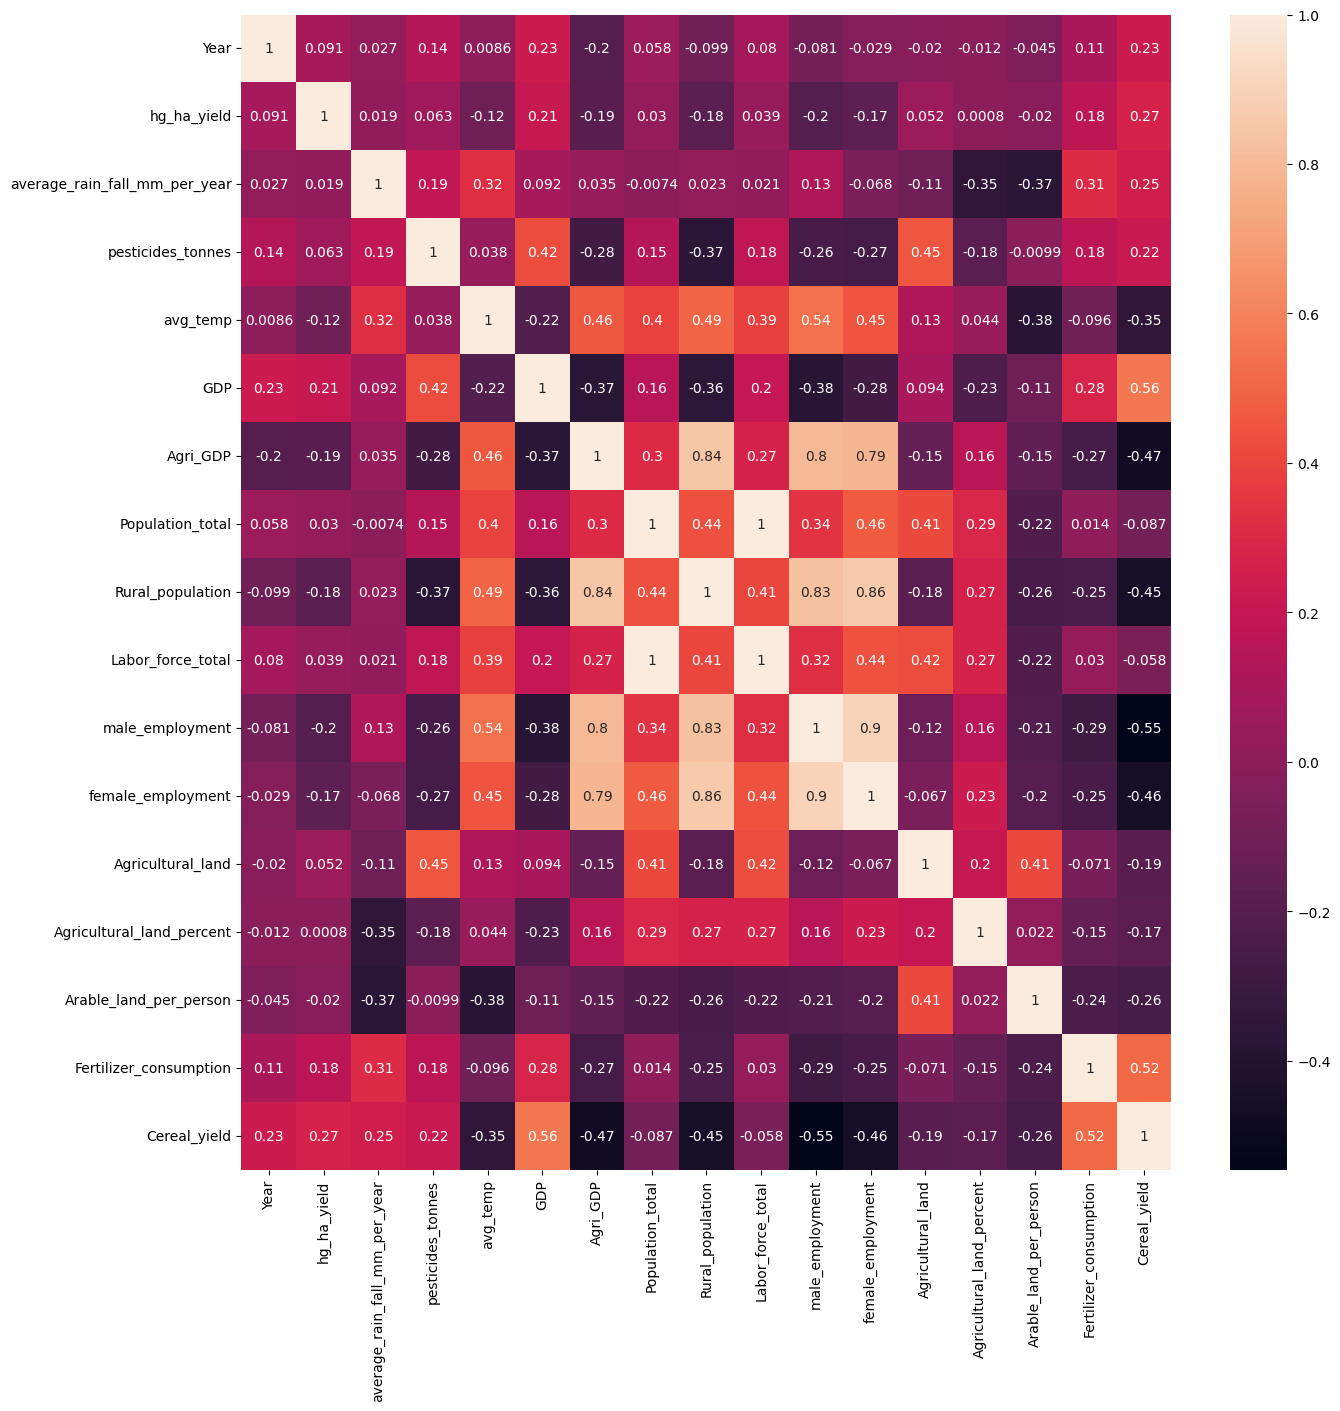

In [22]:
fig, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(data.corr(),annot = True)

In [23]:
data.describe()

,Year,hg_ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,GDP,Agri_GDP,Population_total,Rural_population,Labor_force_total,male_employment,female_employment,Agricultural_land,Agricultural_land_percent,Arable_land_per_person,Fertilizer_consumption,Cereal_yield
count,26615.000000,26615.000000,26615.000000,26615.000000,26615.000000,2.661500e+04,26615.000000,2.661500e+04,26615.000000,2.661500e+04,26615.000000,26615.000000,2.661500e+04,26615.000000,26615.000000,26615.000000,26615.000000
mean,2001.561788,77205.538305,1145.430658,38460.122791,20.591266,6.181974e+11,12.916387,2.197007e+08,45.212729,8.304469e+07,31.769375,33.418021,8.761913e+05,45.339646,0.289693,125.012142,2876.303964
std,7.044998,85225.138680,736.074991,61371.219837,6.335158,1.022476e+12,10.311875,3.748762e+08,23.693506,1.360620e+08,21.504591,30.994588,1.033685e+06,19.440537,0.323422,154.055406,1496.266192
min,1990.000000,50.000000,16.703610,0.040000,1.300000,3.485331e+08,0.094196,4.127560e+05,1.215000,1.262800e+05,0.460000,0.010000,6.100000e+02,0.448718,0.008401,0.005017,152.600000
25%,1995.000000,19690.000000,572.223200,1844.000000,16.800000,2.860792e+10,3.955399,1.383605e+07,22.848000,5.490081e+06,12.240000,5.570000,8.711200e+04,28.104339,0.127731,57.003546,1928.700000
50%,2001.000000,37669.000000,1012.810100,18025.000000,21.690000,2.421869e+11,9.355656,4.431392e+07,43.248000,1.928934e+07,29.770000,18.010000,3.666900e+05,47.680573,0.194824,97.316029,2580.800000
75%,2008.000000,106678.000000,1656.497400,51435.130000,26.020000,7.091485e+11,21.287195,1.758737e+08,68.923000,7.022161e+07,48.570000,67.930000,1.797570e+06,60.563906,0.282356,156.495698,3553.100000
max,2013.000000,501412.000000,3732.507000,367778.000000,30.650000,6.272363e+12,53.380922,1.291132e+09,94.584000,4.765742e+08,91.570000,96.849998,4.691430e+06,85.487373,2.194990,2299.421663,9710.000000


In [24]:
data.describe(include="object").T

,count,unique,top,freq
Country,26615,94,India,4048
Item,26615,10,Potatoes,3998


# 2.2 Outlier Detection and Handling

<function matplotlib.pyplot.show(close=None, block=None)>

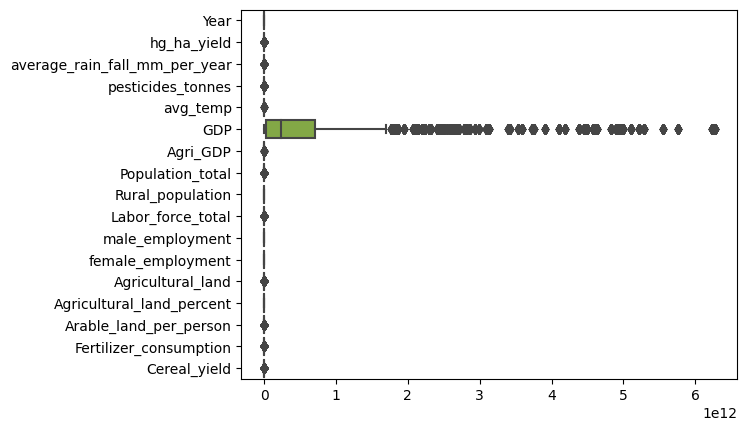

In [25]:
sns.boxplot(data=data,orient='h')
plt.show

In [26]:
out=['hg_ha_yield','pesticides_tonnes','avg_temp','GDP','Agri_GDP',
     'Population_total','Labor_force_total','Agricultural_land','Arable_land_per_person',
     'Fertilizer_consumption','Cereal_yield']
ind1,ind2,i1,i2=[],[],[],[]

for i in out:
    print('Handling Outliers in',i.upper(),'COLUMN: \n')
    Q1=np.percentile(data[i],25,interpolation='midpoint')
    Q2=np.percentile(data[i],50,interpolation='midpoint')
    Q3=np.percentile(data[i],75,interpolation='midpoint')

    IQR = Q3-Q1
    low_lim = Q1-1.5*IQR
    up_lim = Q3+1.5*IQR
    
    print('The values below',low_lim,'and above',up_lim,'are outliers.')
    
    outlier=[]
    for x in data[i]:
        if x > up_lim or x < low_lim:
            outlier.append(x)
            
    print('There are',len(outlier),'outliers in',i,'column.')
            
    ind1,ind2=data[i] > up_lim, data[i]
    i1=data.loc[ind1].index

#     data.drop(i1,inplace=True)
    
#     print('Shape of dataset after removal of outliers in',i.upper(),'column:',data.shape,'\n\n')

Handling Outliers in HG_HA_YIELD COLUMN: 

The values below -110792.0 and above 237160.0 are outliers.
There are 1808 outliers in hg_ha_yield column.
Handling Outliers in PESTICIDES_TONNES COLUMN: 

The values below -72542.69499999999 and above 125821.82499999998 are outliers.
There are 1418 outliers in pesticides_tonnes column.
Handling Outliers in AVG_TEMP COLUMN: 

The values below 2.9700000000000024 and above 39.849999999999994 are outliers.
There are 46 outliers in avg_temp column.
Handling Outliers in GDP COLUMN: 

The values below -992202967384.9454 and above 1729959404118.4224 are outliers.
There are 2542 outliers in GDP column.
Handling Outliers in AGRI_GDP COLUMN: 

The values below -22.04229394379946 and above 47.28488765570873 are outliers.
There are 86 outliers in Agri_GDP column.
Handling Outliers in POPULATION_TOTAL COLUMN: 

The values below -229220452.5 and above 418930223.5 are outliers.
There are 4048 outliers in Population_total column.
Handling Outliers in LABOR_FO

C:\Users\User\AppData\Local\Temp\ipykernel_19072\589790267.py:8: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q1=np.percentile(data[i],25,interpolation='midpoint')
C:\Users\User\AppData\Local\Temp\ipykernel_19072\589790267.py:9: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q2=np.percentile(data[i],50,interpolation='midpoint')
C:\Users\User\AppData\Local\Temp\ipykernel_19072\589790267.py:10: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' a

In [27]:
df=data

In [28]:
percentile25 = df['hg_ha_yield'].quantile(0.25)
percentile75 = df['hg_ha_yield'].quantile(0.75)
print("75th quartile: ",percentile75)
print("25th quartile: ",percentile25)
iqr = percentile75 - percentile25
print ("IQR: ",iqr)
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print("Upper limit: ",upper_limit)
print("Lower limit: ",lower_limit)
#CAPPING
new_df_cap = df.copy()

# new_df_cap['hg_ha_yield']=new_df_cap['hg_ha_yield'] > upper_limit
new_df_cap['hg_ha_yield']= np.where(
    new_df_cap['hg_ha_yield'] > upper_limit,
    upper_limit,
    np.where(
        new_df_cap['hg_ha_yield'] < lower_limit,
        lower_limit,
        new_df_cap['hg_ha_yield']
    )
) 

75th quartile:  106678.0
25th quartile:  19690.0
IQR:  86988.0
Upper limit:  237160.0
Lower limit:  -110792.0


In [29]:
percentile25 = df['Cereal_yield'].quantile(0.25)
percentile75 = df['Cereal_yield'].quantile(0.75)
print("75th quartile: ",percentile75)
print("25th quartile: ",percentile25)
iqr = percentile75 - percentile25
print ("IQR: ",iqr)
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print("Upper limit: ",upper_limit)
print("Lower limit: ",lower_limit)
#CAPPING

new_df_cap['Cereal_yield']= np.where(
    new_df_cap['Cereal_yield'] > upper_limit,
    upper_limit,
    np.where(
        new_df_cap['Cereal_yield'] < lower_limit,
        lower_limit,
        new_df_cap['Cereal_yield']
    )
)

75th quartile:  3553.1
25th quartile:  1928.7
IQR:  1624.3999999999999
Upper limit:  5989.7
Lower limit:  -507.89999999999986


In [30]:
percentile25 = df['pesticides_tonnes'].quantile(0.25)
percentile75 = df['pesticides_tonnes'].quantile(0.75)
print("75th quartile: ",percentile75)
print("25th quartile: ",percentile25)
iqr = percentile75 - percentile25
print ("IQR: ",iqr)
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print("Upper limit: ",upper_limit)
print("Lower limit: ",lower_limit)
#CAPPING

new_df_cap['pesticides_tonnes']= np.where(
    new_df_cap['pesticides_tonnes'] > upper_limit,
    upper_limit,
    np.where(
        new_df_cap['pesticides_tonnes'] < lower_limit,
        lower_limit,
        new_df_cap['pesticides_tonnes']
    )
)

75th quartile:  51435.13
25th quartile:  1844.0
IQR:  49591.13
Upper limit:  125821.82499999998
Lower limit:  -72542.69499999999


In [31]:
percentile25 = df['average_rain_fall_mm_per_year'].quantile(0.25)
percentile75 = df['average_rain_fall_mm_per_year'].quantile(0.75)
print("75th quartile: ",percentile75)
print("25th quartile: ",percentile25)
iqr = percentile75 - percentile25
print ("IQR: ",iqr)
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print("Upper limit: ",upper_limit)
print("Lower limit: ",lower_limit)
#CAPPING

new_df_cap['average_rain_fall_mm_per_year']= np.where(
    new_df_cap['average_rain_fall_mm_per_year'] > upper_limit,
    upper_limit,
    np.where(
        new_df_cap['average_rain_fall_mm_per_year'] < lower_limit,
        lower_limit,
        new_df_cap['average_rain_fall_mm_per_year']
    )
)

75th quartile:  1656.4974
25th quartile:  572.2232
IQR:  1084.2741999999998
Upper limit:  3282.9087
Lower limit:  -1054.1880999999998


In [32]:
data=new_df_cap

# 2.4: Standardization/Normalization

In [33]:
from sklearn import preprocessing
standardisation = preprocessing.StandardScaler()

# 3: Exploratory Data Analysis (EDA)

                      Item
Potatoes              3998
Maize                 3837
Wheat                 3611
Rice, paddy           3176
Soybeans              3052
Sorghum               2849
Sweet potatoes        2767
Cassava               1997
Yams                   799
Plantains and others   529


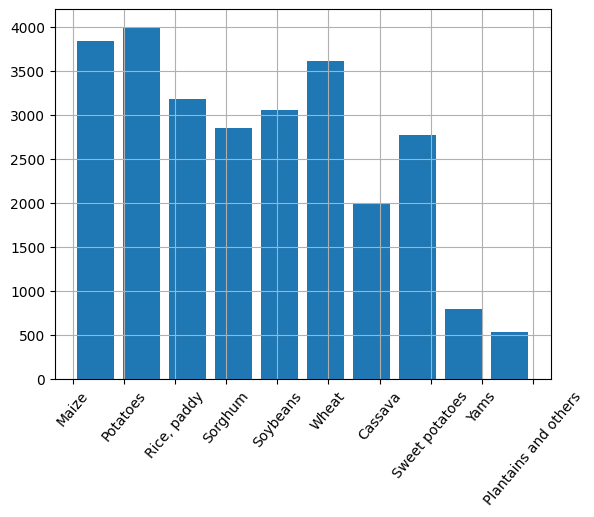

In [34]:
print(data['Item'].value_counts().to_frame())
plt.hist(data['Item'],rwidth=.8)
plt.xticks(rotation=50)
plt.grid()
plt.show()

In [35]:
data.head()

,Country,Item,Year,hg_ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,GDP,Agri_GDP,Population_total,Rural_population,Labor_force_total,male_employment,female_employment,Agricultural_land,Agricultural_land_percent,Arable_land_per_person,Fertilizer_consumption,Cereal_yield
0,Albania,Maize,1990,36613.0,812.2345,121.0,16.37,2.028554e+09,36.410864,3286542,63.572,1374478,51.610001,66.160004,11210.0,40.912409,0.176173,176.165803,2794.4
1,Albania,Potatoes,1990,66667.0,812.2345,121.0,16.37,2.028554e+09,36.410864,3286542,63.572,1374478,51.610001,66.160004,11210.0,40.912409,0.176173,176.165803,2794.4
2,Albania,"Rice, paddy",1990,23333.0,812.2345,121.0,16.37,2.028554e+09,36.410864,3286542,63.572,1374478,51.610001,66.160004,11210.0,40.912409,0.176173,176.165803,2794.4
3,Albania,Sorghum,1990,12500.0,812.2345,121.0,16.37,2.028554e+09,36.410864,3286542,63.572,1374478,51.610001,66.160004,11210.0,40.912409,0.176173,176.165803,2794.4
4,Albania,Soybeans,1990,7000.0,812.2345,121.0,16.37,2.028554e+09,36.410864,3286542,63.572,1374478,51.610001,66.160004,11210.0,40.912409,0.176173,176.165803,2794.4


C:\Users\User\AppData\Local\Temp\ipykernel_19072\2654781816.py:13: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


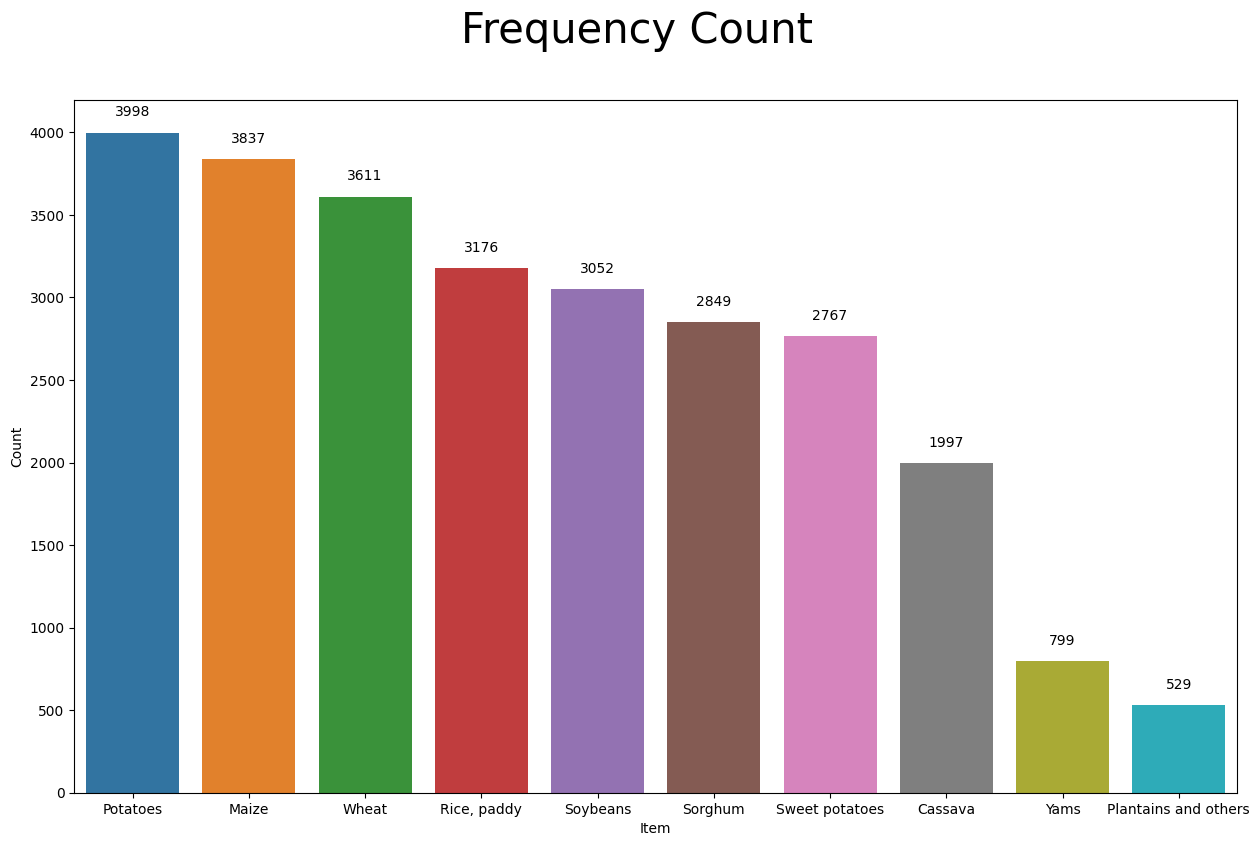

In [36]:
fig, axs = plt.subplots(1,1, figsize=(15,9))
fig.suptitle('Frequency Count', size=30)

temp_df = data['Item'].value_counts().to_frame().reset_index()
g = sns.barplot(x='index', y='Item', data=temp_df, orient='v', ax=axs)

for index, row in temp_df.iterrows():
    g.text(row.name,row.Item + 100, row.Item, color='black', ha="center")

axs.set_xlabel('Item')
axs.set_ylabel('Count')

fig.show()

Item
Potatoes                36.486199
Sweet potatoes          16.696901
Cassava                 14.536450
Maize                    7.184171
Rice, paddy              6.508343
Wheat                    5.676169
Yams                     4.880703
Plantains and others     2.811544
Sorghum                  2.672323
Soybeans                 2.547197
Name: hg_ha_yield, dtype: float64


Text(0.5, 1.0, 'Total Yield Percentage of Each Crop')

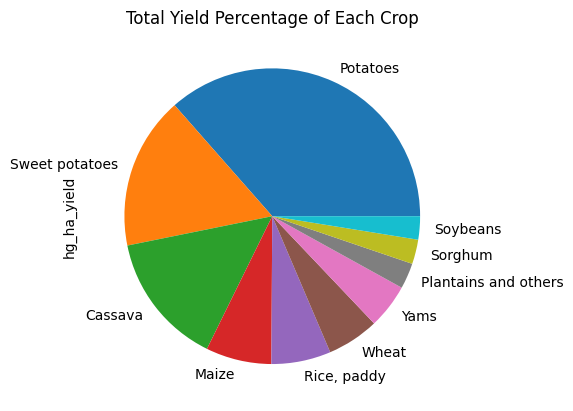

In [37]:
#Plot yield percentage of each crop
total_yield=data.groupby('Item')['hg_ha_yield'].sum().sort_values(ascending=False)
total = data.hg_ha_yield.sum()
percent = (total_yield/total).sort_values(ascending=False)
percent = percent*100
print(percent)
percent.plot.pie().set_title('Total Yield Percentage of Each Crop') 

Text(0.5, 1.0, 'Country-wise Average Rainfall')

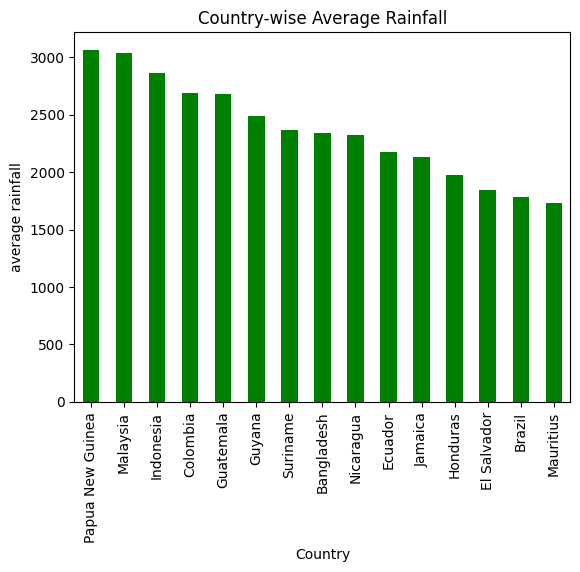

In [38]:
#average rainfall of each country
total_rainfall=data.groupby('Country')['average_rain_fall_mm_per_year'].mean().sort_values(ascending=False).head(15)
total_rainfall.plot.bar(ylabel="average rainfall",color="green").set_title('Country-wise Average Rainfall') 

C:\Users\User\AppData\Local\Temp\ipykernel_19072\1140389346.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df[['Fertilizer_consumption','Item','Country']].loc[df['Country'] == 'Albania'].groupby(['Item']).mean().plot()


Text(0.5, 1.0, 'Fertilizer consumption of Albania')

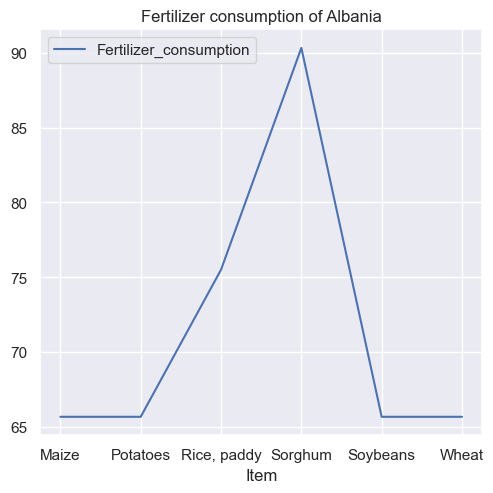

In [39]:
#Fertilizer consumption in country Albania
sns.set(rc={'figure.figsize':(5.7,5.27)})
df[['Fertilizer_consumption','Item','Country']].loc[df['Country'] == 'Albania'].groupby(['Item']).mean().plot()
plt.title('Fertilizer consumption of Albania')


C:\Users\User\AppData\Local\Temp\ipykernel_19072\599028945.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df[['avg_temp','Year','Country']].loc[df['Country'] == 'India'].groupby('Year').mean().plot()


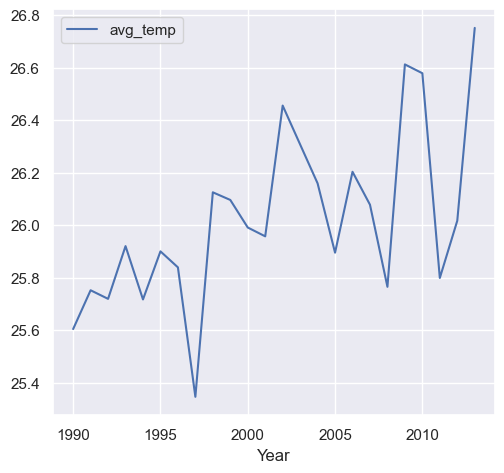

In [40]:
sns.set(rc={'figure.figsize':(5.7,5.27)})
df[['avg_temp','Year','Country']].loc[df['Country'] == 'India'].groupby('Year').mean().plot()
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_19072\3911543700.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  rain_data = df[['average_rain_fall_mm_per_year','Year','Country']].groupby('Year').mean()


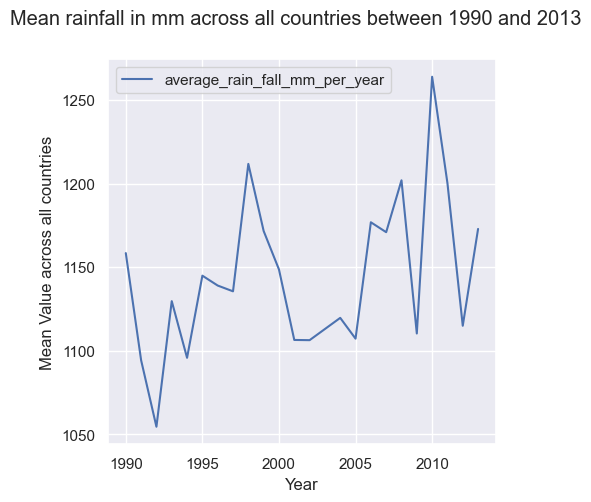

In [41]:
sns.set(rc={'figure.figsize':(5.7,5.27)})
# prepare data
rain_data = df[['average_rain_fall_mm_per_year','Year','Country']].groupby('Year').mean()

# plot data
fig, ax = plt.subplots(figsize=(5,5))
fig.suptitle('Mean rainfall in mm across all countries between 1990 and 2013')

rain_data.plot(ax=ax)

ax.set_ylabel('Mean Value across all countries')
ax.set_xlabel('Year')

plt.show()
     

C:\Users\User\AppData\Local\Temp\ipykernel_19072\2280899158.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  temp_data = df[['avg_temp','Year','Country']].groupby('Year').mean()


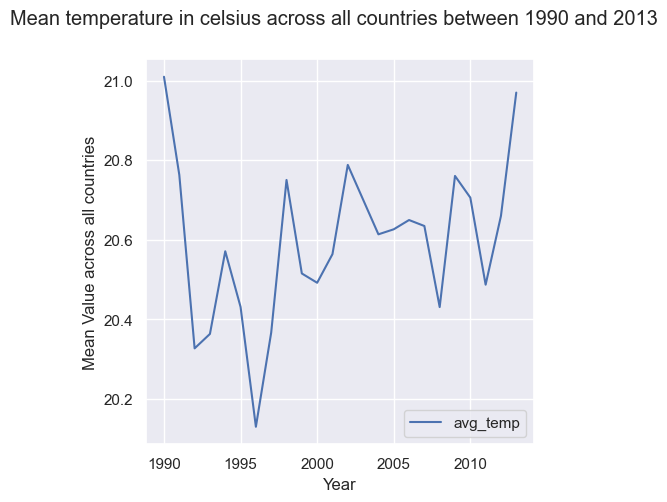

In [42]:
# prepare data
temp_data = df[['avg_temp','Year','Country']].groupby('Year').mean()

# plot data
fig, ax = plt.subplots(figsize=(5,5))
fig.suptitle('Mean temperature in celsius across all countries between 1990 and 2013')

temp_data.plot(ax=ax)

ax.set_ylabel('Mean Value across all countries')
ax.set_xlabel('Year')

plt.show()

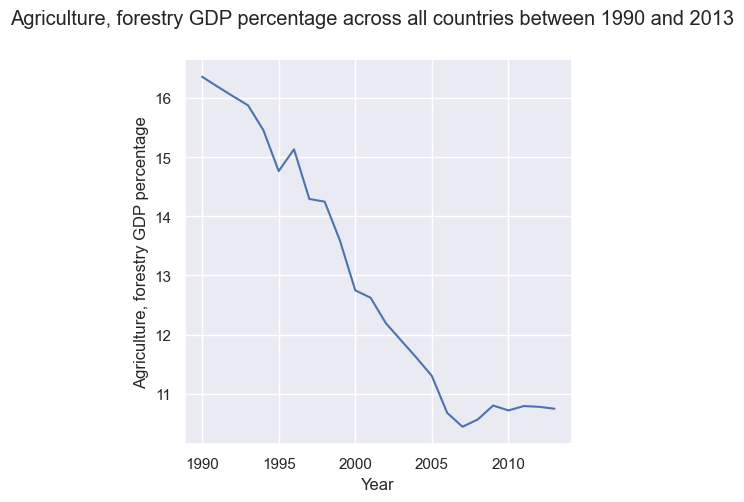

In [43]:
# prepare data
gdp = df[['Agri_GDP','Year','Country']].groupby('Year')['Agri_GDP'].mean()

# plot data
fig, ax = plt.subplots(figsize=(5,5))
fig.suptitle('Agriculture, forestry GDP percentage across all countries between 1990 and 2013')

gdp.plot(ax=ax)

ax.set_ylabel('Agriculture, forestry GDP percentage')
ax.set_xlabel('Year')

plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_19072\883259754.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  gdp = df[['male_employment','female_employment' ,'Year','Country']].groupby('Year')['male_employment','female_employment'].mean()


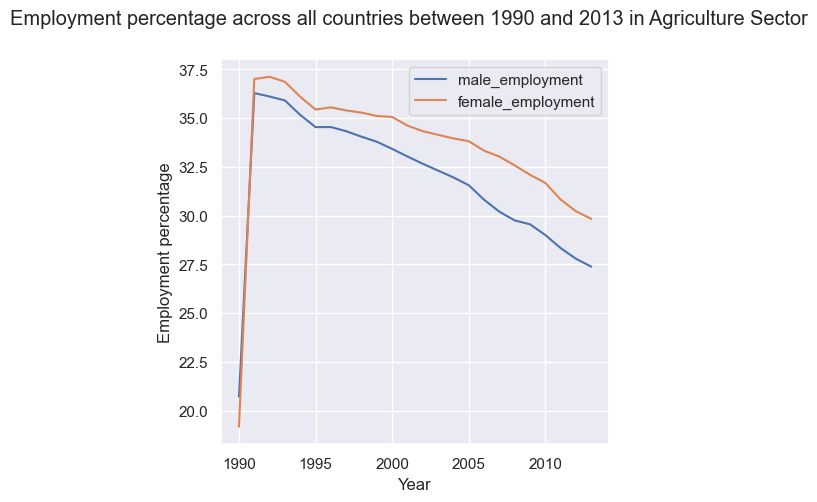

In [44]:
# prepare data
gdp = df[['male_employment','female_employment' ,'Year','Country']].groupby('Year')['male_employment','female_employment'].mean()

# plot data
fig, ax = plt.subplots(figsize=(5,5))
fig.suptitle('Employment percentage across all countries between 1990 and 2013 in Agriculture Sector')

gdp.plot(ax=ax)

ax.set_ylabel('Employment percentage')
ax.set_xlabel('Year')

plt.show()

## Label encoding 

In [45]:
#Encoding


from sklearn.preprocessing import LabelEncoder
class_en = LabelEncoder()
data['Country']=class_en.fit_transform(data['Country'])
data['Item']=class_en.fit_transform(data['Item'])

# 4.Modeling

In [46]:
data.columns

Index(['Country', 'Item', 'Year', 'hg_ha_yield',
       'average_rain_fall_mm_per_year', 'pesticides_tonnes', 'avg_temp', 'GDP',
       'Agri_GDP', 'Population_total', 'Rural_population', 'Labor_force_total',
       'male_employment', 'female_employment', 'Agricultural_land',
       'Agricultural_land_percent', 'Arable_land_per_person',
       'Fertilizer_consumption', 'Cereal_yield'],
      dtype='object')

In [47]:
data.tail(20)

,Country,Item,Year,hg_ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,GDP,Agri_GDP,Population_total,Rural_population,Labor_force_total,male_employment,female_employment,Agricultural_land,Agricultural_land_percent,Arable_land_per_person,Fertilizer_consumption,Cereal_yield
27208,93,5,2011,2267.0,757.51325,3340.35,20.78,1.410192e+10,8.665865,13025785,66.985,4843119,59.959999,71.650002,164000.0,42.393693,0.322437,26.548333,587.4
27209,93,6,2011,12054.0,757.51325,3340.35,20.78,1.410192e+10,8.665865,13025785,66.985,4843119,59.959999,71.650002,164000.0,42.393693,0.322437,26.548333,587.4
27210,93,7,2011,21953.0,757.51325,3340.35,20.78,1.410192e+10,8.665865,13025785,66.985,4843119,59.959999,71.650002,164000.0,42.393693,0.322437,26.548333,587.4
27211,93,8,2011,26274.0,757.51325,3340.35,20.78,1.410192e+10,8.665865,13025785,66.985,4843119,59.959999,71.650002,164000.0,42.393693,0.322437,26.548333,587.4
27212,93,0,2012,47010.0,543.74841,3375.53,20.52,1.711485e+10,8.044518,13265331,67.166,4931171,60.490002,71.379997,162000.0,41.876696,0.301538,18.250000,695.7
27213,93,1,2012,7912.0,543.74841,3375.53,20.52,1.711485e+10,8.044518,13265331,67.166,4931171,60.490002,71.379997,162000.0,41.876696,0.301538,18.250000,695.7
27214,93,3,2012,171875.0,543.74841,3375.53,20.52,1.711485e+10,8.044518,13265331,67.166,4931171,60.490002,71.379997,162000.0,41.876696,0.301538,18.250000,695.7
27215,93,4,2012,22581.0,543.74841,3375.53,20.52,1.711485e+10,8.044518,13265331,67.166,4931171,60.490002,71.379997,162000.0,41.876696,0.301538,18.250000,695.7
27216,93,5,2012,2046.0,543.74841,3375.53,20.52,1.711485e+10,8.044518,13265331,67.166,4931171,60.490002,71.379997,162000.0,41.876696,0.301538,18.250000,695.7
27217,93,6,2012,15300.0,543.74841,3375.53,20.52,1.711485e+10,8.044518,13265331,67.166,4931171,60.490002,71.379997,162000.0,41.876696,0.301538,18.250000,695.7


In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26615 entries, 0 to 27227
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        26615 non-null  int32  
 1   Item                           26615 non-null  int32  
 2   Year                           26615 non-null  int64  
 3   hg_ha_yield                    26615 non-null  float64
 4   average_rain_fall_mm_per_year  26615 non-null  float64
 5   pesticides_tonnes              26615 non-null  float64
 6   avg_temp                       26615 non-null  float64
 7   GDP                            26615 non-null  float64
 8   Agri_GDP                       26615 non-null  float64
 9   Population_total               26615 non-null  int64  
 10  Rural_population               26615 non-null  float64
 11  Labor_force_total              26615 non-null  int64  
 12  male_employment                26615 non-null 

In [49]:
df1 = data.drop(["Country","Agri_GDP","Population_total","Rural_population",
           "Labor_force_total","male_employment","female_employment","Agricultural_land",
           "Agricultural_land_percent","Arable_land_per_person","pesticides_tonnes","hg_ha_yield", 'GDP','Fertilizer_consumption'], axis=1)
df1.head(20)

,Item,Year,average_rain_fall_mm_per_year,avg_temp,Cereal_yield
0,1,1990,812.23450,16.37,2794.4
1,3,1990,812.23450,16.37,2794.4
2,4,1990,812.23450,16.37,2794.4
3,5,1990,812.23450,16.37,2794.4
4,6,1990,812.23450,16.37,2794.4
5,8,1990,812.23450,16.37,2794.4
6,1,1991,917.86880,15.36,2071.9
7,3,1991,917.86880,15.36,2071.9
8,4,1991,917.86880,15.36,2071.9
9,5,1991,917.86880,15.36,2071.9


In [50]:
df1.isna().sum()

Item                             0
Year                             0
average_rain_fall_mm_per_year    0
avg_temp                         0
Cereal_yield                     0
dtype: int64

In [51]:
data=df1

In [52]:
# Splitting the dataset into features and target set.
x=data.drop(['Cereal_yield'],axis=1)
y=pd.DataFrame(data['Cereal_yield'])

# Models: This is classification model to predict Cereal_Yield.
Logisitic regression, k-NN, SVM(radial and polynomial), Decision Tree

In [53]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42,test_size=0.3)

In [54]:
x_train.head()

,Item,Year,average_rain_fall_mm_per_year,avg_temp
116,4,1993,62.42360,17.00
2962,9,1994,1837.92460,18.42
12336,6,2002,862.40223,27.72
13362,4,2009,936.64415,26.31
16423,9,2005,1390.02740,12.99


In [57]:
# #Scaling of data
# num_cols = ['Country', 'Item','average_rain_fall_mm_per_year',
#            'pesticides_tonnes','avg_temp','GDP','Agri_GDP','Rural_population',
#            'Labor_force_total','male_employment','female_employment','Agricultural_land','Agricultural_land_percent','Arable_land_per_person',
#            'Fertilizer_consumption']

In [58]:
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# x_train.loc[:,num_cols] = sc.fit_transform(x_train[num_cols])
# x_test.loc[:,num_cols] = sc.fit_transform(x_test[num_cols])

# Model Building

In [59]:
#Linear Regression
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)

In [60]:
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
print('Mean Squared Error =',mean_squared_error(y_test,y_pred))
print('Mean absolute Error =',mean_absolute_error(y_test,y_pred))
print('R2 Score =',r2_score(y_test,y_pred))

Mean Squared Error = 1321266.5373182609
Mean absolute Error = 889.7191421767194
R2 Score = 0.33058705104331954


In [61]:
y_test = pd.DataFrame(y_test)
y_pred = pd.DataFrame(y_pred)
table = pd.concat([y_test, y_pred], axis=1)
table = table.dropna()
table.columns = ['Actual Price','Predicted Price']
table.head()

,Actual Price,Predicted Price
5614,2594.5,2338.050076
6733,3358.8,2789.128866
6285,4264.3,2887.883596
5443,1676.3,2344.059351
6761,3664.2,4260.881965


In [62]:
#KNN Regressor
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=12)
knn.fit(x_train, y_train)
y_pred_knn = knn.predict(x_test)

In [63]:
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
print('Mean Squared Error =',mean_squared_error(y_test,y_pred_knn))
print('Mean absolute Error =',mean_absolute_error(y_test,y_pred_knn))
print('R2 Score =',r2_score(y_test,y_pred_knn))

Mean Squared Error = 392563.6584868156
Mean absolute Error = 323.2326967230224
R2 Score = 0.801109625606462


In [64]:
y_test = pd.DataFrame(y_test)
y_pred = pd.DataFrame(y_pred_knn)
table = pd.concat([y_test, y_pred], axis=1)
table = table.dropna()
table.columns = ['Actual value','Predicted value']
table.head()

,Actual value,Predicted value
5614,2594.5,2371.716667
6733,3358.8,2521.800000
6285,4264.3,3738.866667
5443,1676.3,3001.300000
6761,3664.2,3479.625000


In [65]:
#Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor(random_state=45,max_depth=16,n_estimators=200)
rf_reg.fit(x_train, y_train)
y_pred_rf = rf_reg.predict(x_test)

C:\Users\User\AppData\Local\Temp\ipykernel_19072\3479472157.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_reg.fit(x_train, y_train)


In [66]:
from sklearn.metrics import mean_squared_error, r2_score,accuracy_score
print('Mean Squared Error =',mean_squared_error(y_test,y_pred_rf))
print('Mean Squared Error =',mean_absolute_error(y_test,y_pred_rf))
print('R2 score',r2_score(y_test,y_pred_rf))

Mean Squared Error = 31730.494971752534
Mean Squared Error = 67.63992892696051
R2 score 0.9839239066373331


In [67]:
y_test = pd.DataFrame(y_test)
y_pred = pd.DataFrame(y_pred_rf)
table = pd.concat([y_test, y_pred], axis=1)
table = table.dropna()
table.columns = ['Actual Value','Predicted Value']
table.head()

,Actual Value,Predicted Value
5614,2594.5,2431.250547
6733,3358.8,2451.183857
6285,4264.3,3001.195210
5443,1676.3,2971.180367
6761,3664.2,3369.329269


In [68]:
a=[[4,1990,800,16]]
y=rf_reg.predict(a)
y

C:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([2400.712])

#Note:

Random Forest Regressor is having the r2 score value with 0.98 and is comparitively good model.

In [ ]:
##sample prediction

In [ ]:

crop = input('enter Crop:')

year = input('enter Year:')
rainfall = input('enter rainfall:')
temp= input('enter Temperature:')
area = int(input('enter area:'))

out_1 = rf_reg.predict([[
       float(year),
       float(crop),
       float(rainfall),
       float(temp)]])
print('crop yield Production:',out_1*area)

In [69]:
from sklearn.linear_model import Lasso
lrf = Lasso(alpha = 1.0, fit_intercept=True, precompute=False, copy_X=True, max_iter=1000, tol=0.0001, warm_start=False, positive=False, random_state=None)
lrf.fit(x_train, y_train)
y_pred = lrf.predict(x_test)
print('mean _absolute_error',mean_absolute_error(y_test, y_pred))
print('R2 score',r2_score(y_test,y_pred))

mean _absolute_error 889.7043991911144
R2 score 0.33057682801206867


In [70]:
import pickle
# open a file, where you ant to store the data
file = open('randomforest_regression_model.pkl', 'wb')

# dump information to that file
pickle.dump(rf_reg, file)

# model for Rainfall and Temperature prediction

In [71]:
data= new_df_cap

In [72]:
data

,Country,Item,Year,hg_ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,GDP,Agri_GDP,Population_total,Rural_population,Labor_force_total,male_employment,female_employment,Agricultural_land,Agricultural_land_percent,Arable_land_per_person,Fertilizer_consumption,Cereal_yield
0,0,1,1990,36613.0,812.23450,121.00,16.37,2.028554e+09,36.410864,3286542,63.572,1374478,51.610001,66.160004,11210.0,40.912409,0.176173,176.165803,2794.4
1,0,3,1990,66667.0,812.23450,121.00,16.37,2.028554e+09,36.410864,3286542,63.572,1374478,51.610001,66.160004,11210.0,40.912409,0.176173,176.165803,2794.4
2,0,4,1990,23333.0,812.23450,121.00,16.37,2.028554e+09,36.410864,3286542,63.572,1374478,51.610001,66.160004,11210.0,40.912409,0.176173,176.165803,2794.4
3,0,5,1990,12500.0,812.23450,121.00,16.37,2.028554e+09,36.410864,3286542,63.572,1374478,51.610001,66.160004,11210.0,40.912409,0.176173,176.165803,2794.4
4,0,6,1990,7000.0,812.23450,121.00,16.37,2.028554e+09,36.410864,3286542,63.572,1374478,51.610001,66.160004,11210.0,40.912409,0.176173,176.165803,2794.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27223,93,4,2013,22581.0,614.81309,2550.07,19.76,1.909102e+10,7.144479,13555422,67.346,5051976,61.740002,71.680000,162000.0,41.876696,0.295085,25.625000,668.5
27224,93,5,2013,3066.0,614.81309,2550.07,19.76,1.909102e+10,7.144479,13555422,67.346,5051976,61.740002,71.680000,162000.0,41.876696,0.295085,25.625000,668.5
27225,93,6,2013,13142.0,614.81309,2550.07,19.76,1.909102e+10,7.144479,13555422,67.346,5051976,61.740002,71.680000,162000.0,41.876696,0.295085,25.625000,668.5
27226,93,7,2013,22222.0,614.81309,2550.07,19.76,1.909102e+10,7.144479,13555422,67.346,5051976,61.740002,71.680000,162000.0,41.876696,0.295085,25.625000,668.5


In [73]:
#Encoding


from sklearn.preprocessing import LabelEncoder
class_en = LabelEncoder()
data['Country']=class_en.fit_transform(data['Country'])
data['Item']=class_en.fit_transform(data['Item'])

In [74]:
df1 = data.drop(["Agri_GDP","Population_total","Rural_population",
           "Labor_force_total","male_employment","female_employment","Agricultural_land",
           "Agricultural_land_percent","Arable_land_per_person","pesticides_tonnes","hg_ha_yield", 'GDP','Fertilizer_consumption','Item','Cereal_yield','avg_temp'], axis=1)
df1

,Country,Year,average_rain_fall_mm_per_year
0,0,1990,812.23450
1,0,1990,812.23450
2,0,1990,812.23450
3,0,1990,812.23450
4,0,1990,812.23450
...,...,...,...
27223,93,2013,614.81309
27224,93,2013,614.81309
27225,93,2013,614.81309
27226,93,2013,614.81309


In [75]:
# Splitting the dataset into features and target set.
x=df1.drop(['average_rain_fall_mm_per_year'],axis=1)
y=pd.DataFrame(df1['average_rain_fall_mm_per_year'])
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42,test_size=0.3)

In [76]:
#Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
rf_reg2 = RandomForestRegressor(random_state=45,max_depth=16,n_estimators=200)
rf_reg2.fit(x_train, y_train)
y_pred_rf2 = rf_reg2.predict(x_test)

C:\Users\User\AppData\Local\Temp\ipykernel_19072\3976838915.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_reg2.fit(x_train, y_train)


In [77]:
from sklearn.metrics import mean_squared_error, r2_score,accuracy_score
print('Mean Squared Error =',mean_squared_error(y_test,y_pred_rf2))
print('Mean Squared Error =',mean_absolute_error(y_test,y_pred_rf2))
print('R2 score',r2_score(y_test,y_pred_rf2))

Mean Squared Error = 689.276014085412
Mean Squared Error = 10.827285866312295
R2 score 0.9987266549382078


In [78]:
import pickle
# open a file, where you ant to store the data
file = open('rf_model_rainfall.pkl', 'wb')

# dump information to that file
pickle.dump(rf_reg2, file)

In [79]:
df1 = data.drop(["Agri_GDP","Population_total","Rural_population",
           "Labor_force_total","male_employment","female_employment","Agricultural_land",
           "Agricultural_land_percent","Arable_land_per_person","pesticides_tonnes","hg_ha_yield", 'GDP','Fertilizer_consumption','Item','Cereal_yield','average_rain_fall_mm_per_year'], axis=1)
df1

,Country,Year,avg_temp
0,0,1990,16.37
1,0,1990,16.37
2,0,1990,16.37
3,0,1990,16.37
4,0,1990,16.37
...,...,...,...
27223,93,2013,19.76
27224,93,2013,19.76
27225,93,2013,19.76
27226,93,2013,19.76


In [80]:
# Splitting the dataset into features and target set.
x=df1.drop(['avg_temp'],axis=1)
y=pd.DataFrame(df1['avg_temp'])
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42,test_size=0.3)

In [81]:
#Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
rf_reg3 = RandomForestRegressor(random_state=45,max_depth=16,n_estimators=200)
rf_reg3.fit(x_train, y_train)
y_pred_rf3 = rf_reg3.predict(x_test)
from sklearn.metrics import mean_squared_error, r2_score,accuracy_score
print('Mean Squared Error =',mean_squared_error(y_test,y_pred_rf3))
print('Mean Squared Error =',mean_absolute_error(y_test,y_pred_rf3))
print('R2 score',r2_score(y_test,y_pred_rf3))

C:\Users\User\AppData\Local\Temp\ipykernel_19072\2206467752.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_reg3.fit(x_train, y_train)


Mean Squared Error = 3.281926700469933
Mean Squared Error = 1.1442581922857566
R2 score 0.9171508006475626


In [82]:
import pickle
# open a file, where you ant to store the data
file = open('rf_model_temp.pkl', 'wb')

# dump information to that file
pickle.dump(rf_reg3, file)